In [63]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 분류 (Classification)

## K Nearest Neighbors (k-최근접 이웃 분류 알고리즘)

가장 중요한 hyperparameter인 **K**값은 근처에 참고(reference)할 **이웃의 숫자**

- k-최근접 이웃 분류 알고리즘
- 가장 고전적이고 직관적인 머신러닝 분류 알고리즘
- 기하학적 거리 분류기
- 가장 **가깝게 위치하는 멤버로 분류**하는 방식

In [4]:
Image(url='https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png', width=500)

## 더미 데이터를 활용한 분류 원리 이해

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

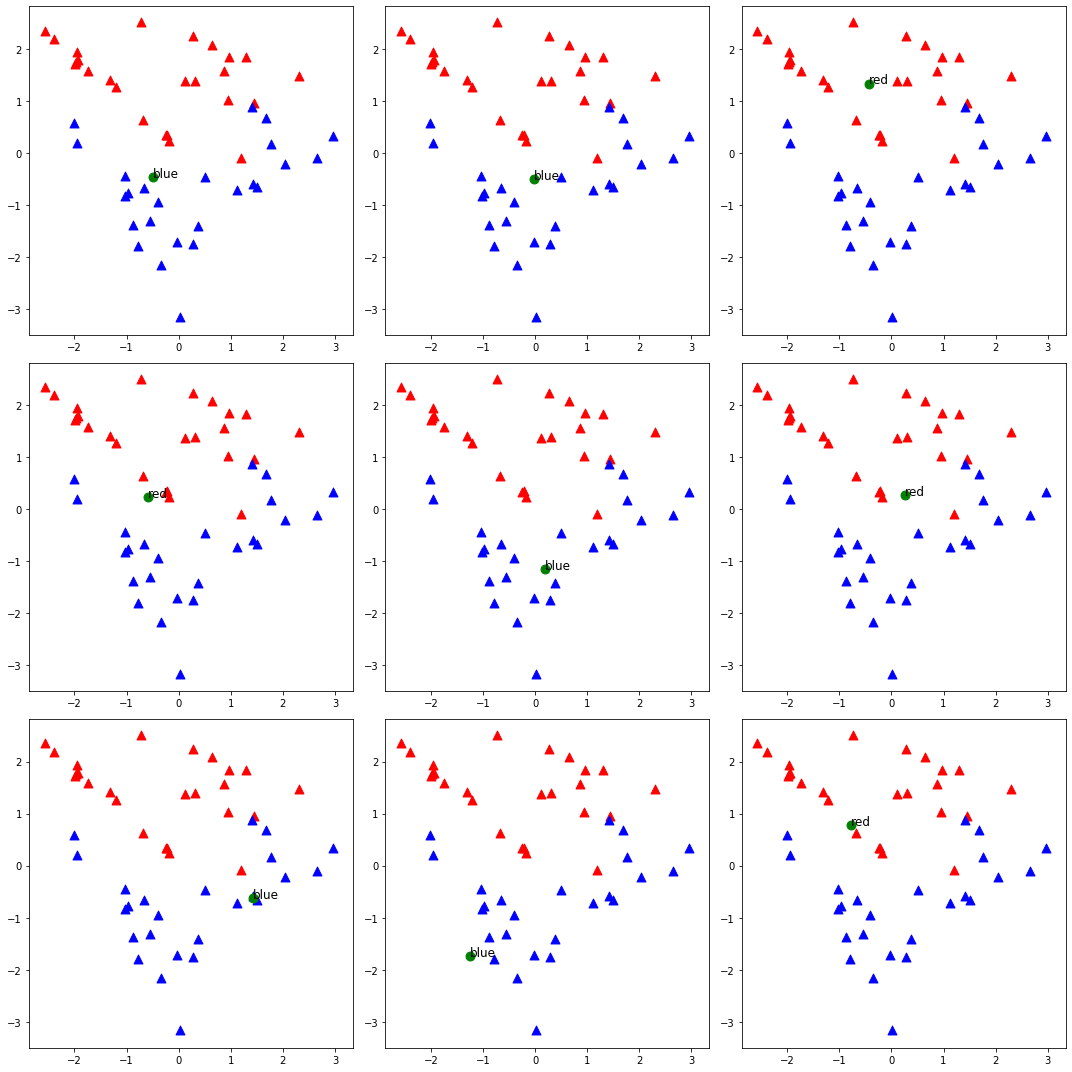

In [18]:
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(15, 15)

for i in range(9):
    # 더미 데이터 생성
    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=30)

    blue = X[y==0]
    red = X[y==1]

    # 랜덤한 새로운 점 생성
    newcomer = np.random.randn(1, 2)
    
    # K
    K = 3*(i//3+1)

    axes[i//3, i%3].scatter(red[:,0], red[:, 1], 80, 'r', '^')
    axes[i//3, i%3].scatter(blue[:,0], blue[:, 1], 80, 'b', '^')
    axes[i//3, i%3].scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')
    
    # n_neighbors=3
    knn = KNeighborsClassifier(n_neighbors=3*(i//3+1))
    knn.fit(X, y)
    pred = knn.predict(newcomer)
    
    # 표기
    axes[i//3, i%3].annotate('red' if pred==1 else 'blue', xy=newcomer[0], xytext=(newcomer[0]), fontsize=12)

plt.tight_layout()
plt.show()

## mnist (손글씨) 데이터셋을 활용한 분류

mnist (손글씨) 데이터셋을 활용하여 0~9까지 분류하는 분류기를 만듭니다.

`sklearn.datasets` 보다 고해상도 이미지이기 때문에 `tensorflow.keras.datasets`을 활용합니다.

In [19]:
from tensorflow.keras.datasets import mnist

In [20]:
(x_digit, y_digit), (_, _15) = mnist.load_data()
x_digit, y_digit = x_digit[:5000], y_digit[:5000]
x_digit = x_digit.reshape(-1, 28*28)
x_digit.shape

(5000, 784)

### mnist (손글씨) 데이터 시각화

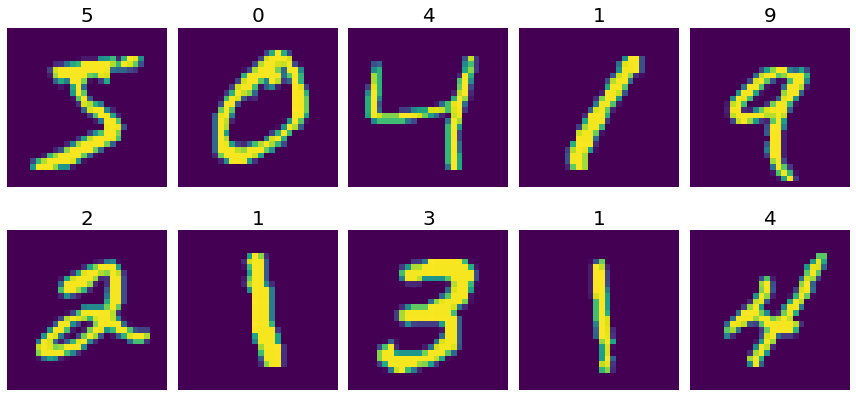

In [21]:
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w*h):
    axes[i//h, i%h].imshow(x_digit[i].reshape(-1, 28))
    axes[i//h, i%h].set_title(y_digit[i], fontsize=20)
    axes[i//h, i%h].axis('off')
plt.tight_layout()
plt.show()

## 데이터 셋 분할

학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(x_digit, y_digit, stratify=y_digit, random_state=30, test_size=0.1)

In [25]:
x_train.shape, x_valid.shape

((4500, 784), (500, 784))

### 모델 정의

`KNeighborsClassifier`를 정의 하고 핵심 hyperparameter 인 `n_neighbors`를 지정합니다.

임의로 5개의 이웃을 보도록 `n_neighbors=5`로 지정하겠습니다.

그리고, `n_jobs` 옵션은 학습에 사용할 코어의 숫자를 지정합니다. -1로 지정하면, 모든 코어를 사용하도록 합니다.

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

### 학습 (fit)

In [27]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### 예측 (predict)

In [28]:
prediction = knn.predict(x_valid)

### 검증 (evaluation)

정확도 (Accuracy) 산출

In [29]:
(prediction == y_valid).mean()

0.938

In [30]:
knn.score(x_valid, y_valid)

0.938

### 최적의 n_neighbors 찾기

In [ ]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = knn.score(x_valid, y_valid)
    print('k: %d, accuracy: %.2f' % (k, score*100))

k: 1, accuracy: 95.60
k: 2, accuracy: 95.00
k: 3, accuracy: 94.60
k: 4, accuracy: 93.80
k: 5, accuracy: 93.80
k: 6, accuracy: 93.40
k: 7, accuracy: 93.40
k: 8, accuracy: 93.60
k: 9, accuracy: 92.80
k: 10, accuracy: 92.80


## Iris 붓꽃 데이터셋을 활용한 실습

### 필요한 데이터셋 불러오기 (load_iris)

In [64]:
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

### 데이터프레임 (DataFrame) 만들기

In [53]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 데이터 셋 분할

학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [54]:
x_train, x_valid, y_train, y_valid = train_test_split(df.iloc[:, :4], df['target'], stratify=df['target'], test_size=0.2, random_state=30)

잘 로드가 되었는지 **shape를 확인**하도록 합니다.

In [55]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [65]:
x_valid.shape, y_valid.shape

((30, 4), (30,))

### 모델 정의

In [57]:
knn = KNeighborsClassifier()

### 학습 (fit)

In [58]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 검증 (evaluation)

In [59]:
prediction = knn.predict(x_valid)

In [60]:
(prediction == y_valid).mean()

0.9333333333333333

In [61]:
knn.score(x_valid, y_valid)

0.9333333333333333

### 최적의 k 값 찾기

In [62]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = knn.score(x_valid, y_valid)
    print('k: %d, accuracy: %.2f' % (k, score*100))

k: 1, accuracy: 96.67
k: 2, accuracy: 93.33
k: 3, accuracy: 96.67
k: 4, accuracy: 96.67
k: 5, accuracy: 93.33
k: 6, accuracy: 93.33
k: 7, accuracy: 96.67
k: 8, accuracy: 96.67
k: 9, accuracy: 96.67
k: 10, accuracy: 96.67
